In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# 1. Carregar os dados
file_path = "C:/Users/afili/Desktop/Uni/Mestrado/AASE/apartments_for_rent_100k_final.csv" 
data = pd.read_csv(file_path, sep=';')

In [104]:
# Selecionar as features para a análise de outliers
features = ['price', 'square_feet', 'bathrooms', 'bedrooms']
X = data[features]

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% de contaminação
data['outlier'] = iso_forest.fit_predict(X)

# Filtrar os dados, removendo os outliers mais notáveis
data_filtrado = data[data['outlier'] == 1]  # Mantém apenas os dados normais (outlier == 1)

# Remover a coluna auxiliar 'outlier' do dataset filtrado
data_filtrado = data_filtrado.drop(columns=['outlier'])


In [105]:
features = [
    'bathrooms', 'bedrooms', 'pets_allowed_transformed', 'cityname_transformed',
    'has_photo_transformed', 'square_feet', 'AC', 'Alarm', 'Basketball',
    'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator',
    'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub',
    'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground',
    'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer',
    'Wood Floors'
]

X = data[features]
X = pd.get_dummies(X, drop_first=True)
y = data['price_class']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
def cross_validate_model_on_train(model, X_train, y_train, model_name):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Acurácia Média (Cross-Validation - Dados de Treino): {scores.mean():.2f}")
    return scores.mean()

In [108]:
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [109]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=10, scoring='accuracy')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_cv_accuracy = cross_validate_model_on_train(best_dt, X_train, y_train, "Árvore de Decisão")

Árvore de Decisão - Acurácia Média (Cross-Validation - Dados de Treino): 0.69


In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=best_dt.classes_, filled=True)
plt.title(f"Árvore de Decisão - Acurácia: {dt_cv_accuracy:.2f}")
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


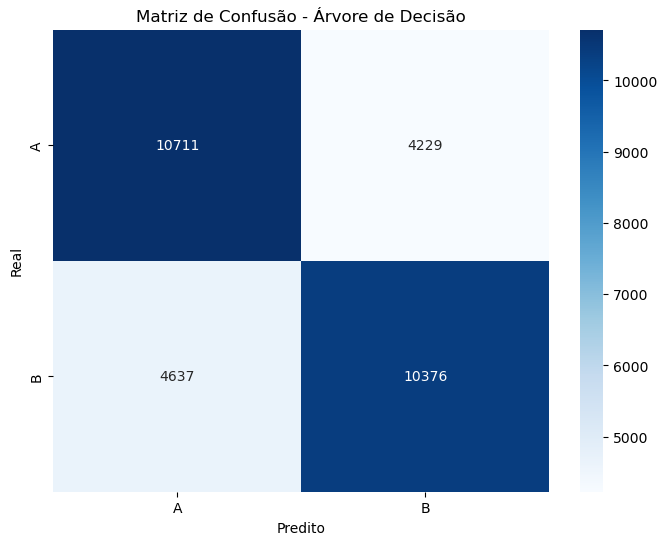

In [81]:
y_pred_dt = best_dt.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

In [82]:
classification_report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
print("Relatório de Classificação - Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))


Relatório de Classificação - Árvore de Decisão:
              precision    recall  f1-score   support

           A       0.70      0.72      0.71     14940
           B       0.71      0.69      0.70     15013

    accuracy                           0.70     29953
   macro avg       0.70      0.70      0.70     29953
weighted avg       0.70      0.70      0.70     29953



In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_cv_accuracy = cross_validate_model_on_train(rf, X_train, y_train, "Random Forest")

Random Forest - Acurácia Média (Cross-Validation - Dados de Treino): 0.72


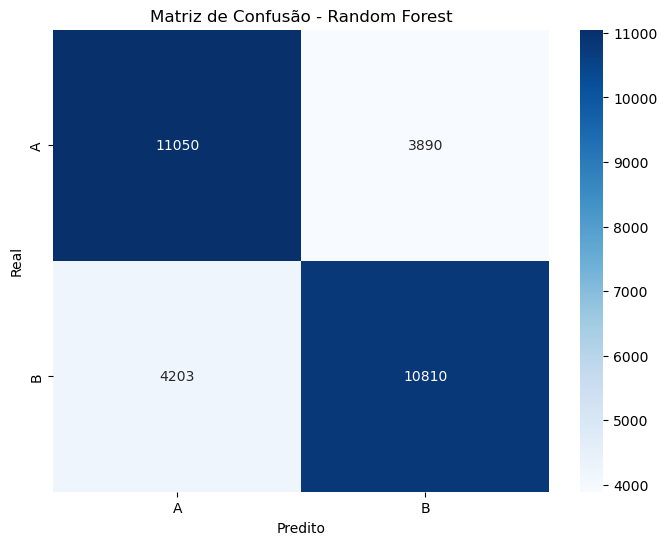

In [84]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           A       0.72      0.74      0.73     14940
           B       0.74      0.72      0.73     15013

    accuracy                           0.73     29953
   macro avg       0.73      0.73      0.73     29953
weighted avg       0.73      0.73      0.73     29953



In [86]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
mlp_cv_accuracy = cross_validate_model_on_train(mlp, X_train, y_train, "Rede Neural Artificial")

Rede Neural Artificial - Acurácia Média (Cross-Validation - Dados de Treino): 0.54


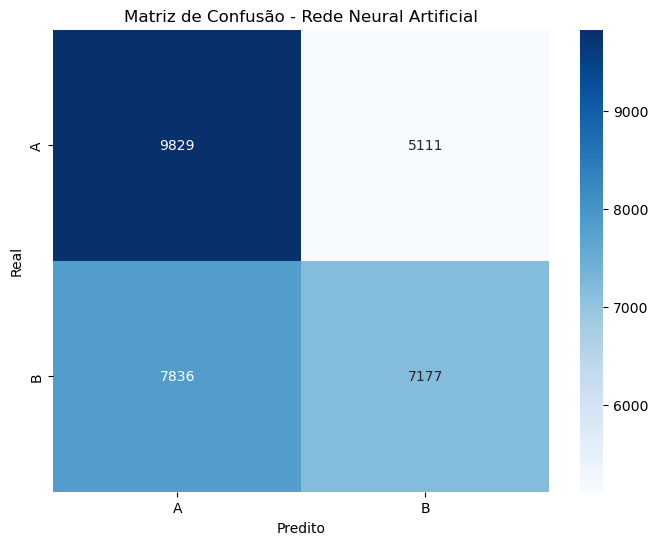

In [87]:
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Rede Neural Artificial")
plt.show()

In [88]:
classification_report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
print("Relatório de Classificação - Rede Neural Artificial:")
print(classification_report(y_test, y_pred_mlp))

Relatório de Classificação - Rede Neural Artificial:
              precision    recall  f1-score   support

           A       0.56      0.66      0.60     14940
           B       0.58      0.48      0.53     15013

    accuracy                           0.57     29953
   macro avg       0.57      0.57      0.56     29953
weighted avg       0.57      0.57      0.56     29953



In [89]:
print("\nComparação de Modelos com Cross-Validation nos Dados de Treino e Métricas no Conjunto de Teste:")
print(f"Árvore de Decisão - Acurácia Média: {dt_cv_accuracy:.2f}, Precisão: {classification_report_dt['weighted avg']['precision']:.2f}, Recall: {classification_report_dt['weighted avg']['recall']:.2f}, F1-Score: {classification_report_dt['weighted avg']['f1-score']:.2f}")
print(f"Random Forest - Acurácia Média: {rf_cv_accuracy:.2f}, Precisão: {classification_report_rf['weighted avg']['precision']:.2f}, Recall: {classification_report_rf['weighted avg']['recall']:.2f}, F1-Score: {classification_report_rf['weighted avg']['f1-score']:.2f}")
print(f"Rede Neural Artificial - Acurácia Média: {mlp_cv_accuracy:.2f}, Precisão: {classification_report_mlp['weighted avg']['precision']:.2f}, Recall: {classification_report_mlp['weighted avg']['recall']:.2f}, F1-Score: {classification_report_mlp['weighted avg']['f1-score']:.2f}")


Comparação de Modelos com Cross-Validation nos Dados de Treino e Métricas no Conjunto de Teste:
Árvore de Decisão - Acurácia Média: 0.69, Precisão: 0.70, Recall: 0.70, F1-Score: 0.70
Random Forest - Acurácia Média: 0.72, Precisão: 0.73, Recall: 0.73, F1-Score: 0.73
Rede Neural Artificial - Acurácia Média: 0.54, Precisão: 0.57, Recall: 0.57, F1-Score: 0.56
